In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import chi2
data=pd.read_csv("Sales_add.csv")

In [2]:
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [3]:
#Check Null values
data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

### 1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing

In [4]:
#H0:There is no significant increase in the sales after stepping into digital marketing
#Ha:There is significant increse in the sales after stepiing into the digital marketing

In [23]:
#alpha value set as .05
alpha=.05

sb=data["Sales_before_digital_add(in $)"]
sa=data["Sales_After_digital_add(in $)"]

#performing the t-test
t_score,p_value=ttest_rel(sa,sb)

print("T score & p-value are : \n  \nt-value = %0.3f  \np-value = %0.3f \n" % (t_score, p_value))

T score & p-value are : 
  
t-value = 12.091  
p-value = 0.000 



In [24]:
if p_value>alpha:
    print("Failing to reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis


In [7]:
#Based on the t-testing carried out on the data that is given we are rejecting the null hypothesis.

**Outcome:There is significant increase in sales after stepping intodigital marketing**

### 2.The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [8]:
#H0:There is no relationship between Region and Manager
#Ha:There is a relationship between Region and Manager

In [9]:
#contigency table
contigency= pd.crosstab(data['Region'], data['Manager']) 
contigency

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


<AxesSubplot:xlabel='Manager', ylabel='Region'>

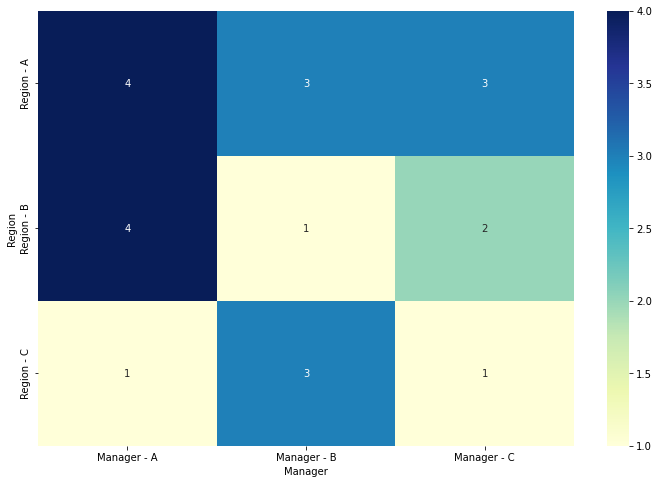

In [10]:
#heatmap of contigency table
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [12]:
#observed value
observed_val=contigency.values
print("Observed values: \n",observed_val)

Observed values: 
 [[4 3 3]
 [4 1 2]
 [1 3 1]]


In [13]:
#Chi-square test of independence of variables in a contingency table
val=stats.chi2_contingency(observed_val)
val

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [14]:
#Expected value
expected_val=val[3]
expected_val
print("Expected value: \n",expected_val)

Expected value: 
 [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [15]:
#Degree of freedom
no_of_rows=len(contigency.iloc[0:3,0])
no_of_cols=len(contigency.iloc[0,0:3])
dof=(no_of_cols-1)*(no_of_cols-1)
print("Degree of freedom:",dof)

Degree of freedom: 4


In [16]:
#chi_square statistics value 
chi_square=sum([(o-e)**2./e for o,e in zip(observed_val,expected_val)])
chi_square_statistics=chi_square[0]+chi_square[1]
print("chi_square statistics value :",chi_square_statistics)

chi_square statistics value : 2.921995464852608


In [17]:
#critical value
critical_val=chi2.ppf(q=1-alpha,df=dof)
print("Critical value :",critical_val)

Critical value : 9.487729036781154


In [18]:
#p_value
p_value=chi2.cdf(x=chi_square_statistics,df=dof)
print("p value :",p_value)

p value : 0.4290370070779911


In [19]:
if p_value>alpha:
    print("Failing to reject the null hypothesis")
else:
    print("Reject the null hypothesis")
if chi_square_statistics>critical_val:
    print("Reject the null hypothesis")
else:
    print("Failing to reject the null hypothesis")

Failing to reject the null hypothesis
Failing to reject the null hypothesis


In [20]:
#Based on the chi-square testing carried out on the data that is given we are failing to reject the null hypothesis.

**Outcome:There is no relationship between Region and Manager**